In [827]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [828]:
file = 'Breathalyzer_data.csv'
df = pd.read_csv(file)
#df.dropna(inplace=True)
df.head()

,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
0,7.9171,5.7525,32.9912,19.2375,24.8,2.7594,-0.3829,0.838,7.013,24.8,38,0.00
1,7.7519,5.9966,37.3944,20.0780,27.1,2.7991,-0.6046,1.217,5.183,24.8,38,0.00
2,7.4855,6.3284,10.1379,18.5940,28.6,3.0434,-0.5220,1.618,6.119,24.7,38,0.00
3,8.3827,5.0866,36.2700,12.3300,29.5,1.2649,-0.4563,1.529,3.132,24.7,38,0.00
4,6.0490,7.7000,6.3800,24.1500,24.6,2.2447,-1.8739,1.100,1.383,22.7,45,0.01


In [829]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gravity_xy        39 non-null     float64
 1   Gravity_z         39 non-null     float64
 2   Light_level       39 non-null     float64
 3   Peak_intensity    39 non-null     float64
 4   Battery_temp      39 non-null     float64
 5   Exponential_a     39 non-null     float64
 6   Exponential_b     39 non-null     float64
 7   Breath_time       39 non-null     float64
 8   Evaporation_time  39 non-null     float64
 9   Ambiant_temp      39 non-null     float64
 10  Ambiant_humidity  39 non-null     int64  
 11  BAC               39 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.8 KB


,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,7.192479,6.562803,24.334995,21.775628,26.874359,2.764574,-0.655513,1.313564,5.785974,23.164103,42.128205,0.010051
std,1.508743,1.748497,16.601014,3.663955,2.141165,0.605645,0.385576,0.352452,3.146564,0.898679,3.088003,0.007207
min,0.164500,4.316000,0.828200,12.231300,21.400000,1.264900,-1.873900,0.838000,1.383000,21.600000,38.000000,0.000000
25%,6.728550,5.582050,9.089250,19.922900,25.350000,2.238800,-0.834950,1.046000,3.110500,22.600000,39.000000,0.004000
50%,7.485500,6.328400,26.714300,22.740700,27.100000,2.913400,-0.505100,1.241000,5.769000,23.400000,42.000000,0.011000
75%,8.061600,7.091150,38.376300,23.420750,28.600000,3.259150,-0.389800,1.478500,7.555000,23.650000,45.500000,0.015000
max,8.800000,14.425000,53.637100,29.909200,30.100000,3.569600,-0.168500,2.297000,12.781000,24.800000,46.000000,0.021000


In [830]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gravity_xy        39 non-null     float64
 1   Gravity_z         39 non-null     float64
 2   Light_level       39 non-null     float64
 3   Peak_intensity    39 non-null     float64
 4   Battery_temp      39 non-null     float64
 5   Exponential_a     39 non-null     float64
 6   Exponential_b     39 non-null     float64
 7   Breath_time       39 non-null     float64
 8   Evaporation_time  39 non-null     float64
 9   Ambiant_temp      39 non-null     float64
 10  Ambiant_humidity  39 non-null     int64  
 11  BAC               39 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.8 KB


,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,7.192479,6.562803,24.334995,21.775628,26.874359,2.764574,-0.655513,1.313564,5.785974,23.164103,42.128205,0.010051
std,1.508743,1.748497,16.601014,3.663955,2.141165,0.605645,0.385576,0.352452,3.146564,0.898679,3.088003,0.007207
min,0.164500,4.316000,0.828200,12.231300,21.400000,1.264900,-1.873900,0.838000,1.383000,21.600000,38.000000,0.000000
25%,6.728550,5.582050,9.089250,19.922900,25.350000,2.238800,-0.834950,1.046000,3.110500,22.600000,39.000000,0.004000
50%,7.485500,6.328400,26.714300,22.740700,27.100000,2.913400,-0.505100,1.241000,5.769000,23.400000,42.000000,0.011000
75%,8.061600,7.091150,38.376300,23.420750,28.600000,3.259150,-0.389800,1.478500,7.555000,23.650000,45.500000,0.015000
max,8.800000,14.425000,53.637100,29.909200,30.100000,3.569600,-0.168500,2.297000,12.781000,24.800000,46.000000,0.021000


In [831]:
df.drop(columns=["Gravity_xy", 
                 "Gravity_z",
                 "Light_level",
                 "Peak_intensity",
                 "Exponential_a"], inplace=True)
df.head()

,Battery_temp,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
0,24.8,-0.3829,0.838,7.013,24.8,38,0.00
1,27.1,-0.6046,1.217,5.183,24.8,38,0.00
2,28.6,-0.5220,1.618,6.119,24.7,38,0.00
3,29.5,-0.4563,1.529,3.132,24.7,38,0.00
4,24.6,-1.8739,1.100,1.383,22.7,45,0.01


<AxesSubplot:>

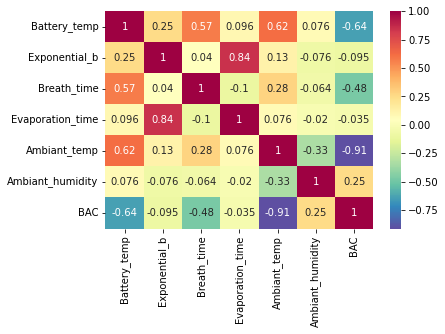

In [832]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')

In [833]:
#sns.pairplot(df)

In [834]:
y = df.pop('BAC').to_numpy()
scaler = StandardScaler()
x = scaler.fit_transform(df, y)


In [856]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)
clf = linear_model.Ridge(alpha=0)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
    
print(f"score: {score}")


score: 0.8981315169265324


In [858]:
clf = linear_model.Ridge(alpha=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(predictions)
print(y_test)

[-0.00213317  0.00410947 -0.00146709  0.00823933  0.00986833  0.00973307
  0.00791481  0.02052856 -0.00062999  0.00821968  0.00105319  0.01425539
  0.00558154  0.02201813]
[0.    0.    0.    0.008 0.011 0.011 0.008 0.021 0.    0.011 0.    0.018
 0.011 0.021]
